<a href="https://colab.research.google.com/github/marlEvalDissertation/marlEvalDiss/blob/main/Guideline_Data_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Aggregation For RL Performance Data

## Roland Dubb

### February 2024

This notebook makes use of multi-criteria decision analysis to aggregate RL algorithm performance data across tasks and runs. The data is found in my [repository](https://github.com/marlEvalDissertation/marlEvalDiss/tree/main/RL_data) and is collected using this [notebook](https://github.com/marlEvalDissertation/marlEvalDiss/blob/main/Guideline_Data_Collection.ipynb).

The data aggregation methodology is found in section 4.1.4 and 4.1.5 of my dissertation titled:

**Addressing Deep Reinforcement Learning Empirical Algorithm Performance Evaluations**

This notebook constructs partial value functions using MCDA for each of three RL tasks, CArtPole, ACrobot and Lunar Lander. We then use these on the RL algorithm performance data along with an additive value function and chosen swing weights to aggregate the data and compare algorithm performances.

### Reading the Performance Data from CSVs

In [ ]:
envs = c("cart","acro","ll")
algs = c("a2c","dqn","ppo")
fileNames = c()
for(i in envs)
{
for(j in algs)
{
for(runs in 1:5)
{
  fileNames = c(fileNames,paste(i,"_",j,runs,".txt.csv",sep=""))
}
}
}

Create arrays of performance data for each algorithm on each task.

In [ ]:
ppoCart = c()
a2cCart = c()
dqnCart = c()
ppoAcro = c()
dqnAcro = c()
a2cAcro = c()
dqnLuLa = c()
a2cLuLa = c()
ppoLuLa = c()

count = 1

for(i in fileNames)
{
   if(count<=15) #cartpole
   {
    data <- read.csv(i)
    if(count<=5)#A2C
    {
      a2cCart = c(a2cCart,data$rewards[10])
    }
    else if(count>=6 && count<=10)#DQN
    {
      dqnCart = c(dqnCart,data$rewards[10])
    }
    else#PPO
    {
      ppoCart = c(ppoCart,data$rewards[10])
    }
   }

   else if (count>=16 && count <=30) #Acrobot
   {
    data <- read.csv(i)
    if(count<=20)#A2C
    {
      a2cAcro = c(a2cAcro,data$rewards[10])
    }
    else if(count>=21 && count <=25)#DQN
    {
      dqnAcro = c(dqnAcro,data$rewards[10])
    }
    else#PPO
    {
      ppoAcro = c(ppoAcro,data$rewards[10])
    }
   }

   else # Lunar Lander
   {
    data <- read.csv(i)
    if(count<=35)#A2C
    {
      a2cLuLa = c(a2cLuLa,data$rewards[10])
    }
    else if(count>=36 && count<=40)#DQN
    {
      dqnLuLa = c(dqnLuLa,data$rewards[10])
    }
    else#PPO
    {
      ppoLuLa = c(ppoLuLa,data$rewards[10])
    }
   }

   count = count +1

}

### Checking local minima and maxima for constructing partial value functions

(in case one is using these as reference points)

In [ ]:
#CARTPOLE
min(min(a2cCart,ppoCart,dqnCart))
max(max(a2cCart,ppoCart,dqnCart))

[1] 28.7

[1] 500

In [ ]:
#ACROBOT
min(min(a2cAcro,dqnAcro,ppoAcro))
max(max(a2cAcro,dqnAcro,ppoAcro))

[1] -119.9

[1] -74.8

In [ ]:
#LuLA
min(min(a2cLuLa,dqnLuLa,ppoLuLa))
max(max(a2cLuLa,dqnLuLa,ppoLuLa))

[1] -483.13

[1] 220.56

### Constructing Cart Pole's Piece-wise Linear Partial Value function from 5 reference points

Creating a mathematical function to use for inputting algorithm performance scores

In [ ]:
# Given (x, y) pairs
x <- c(0, 250, 350, 450, 500) # Your x values
y <- c(0, 25, 50, 75, 100) # Your corresponding y values

# Construct piecewise linear function
Gcartpole <- approxfun(x, y)

# # Example usage
# x_input <- 475 # Input x value
# y_output <- Gcartpole(x_input) # Output y value
# print(y_output)


Check the Function

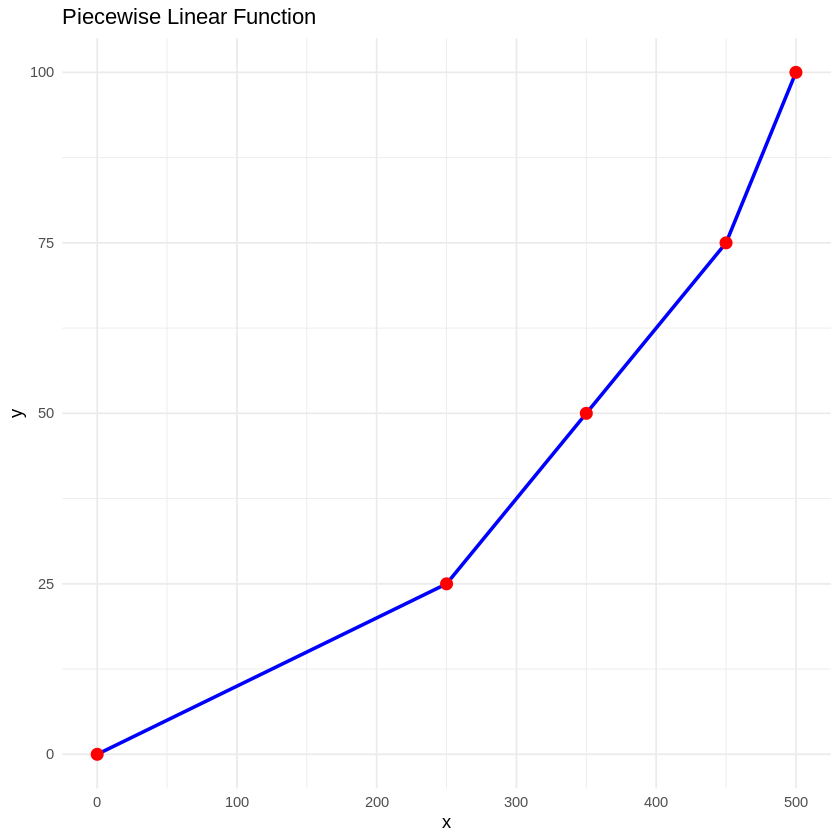

In [ ]:
library(ggplot2)
# Generate x values in the domain [28.7, 500]
x_values <- seq(0, 500, length.out = 1000)

# Calculate corresponding y values
y_values <- Gcartpole(x_values)

# Plot the piecewise linear function
ggplot() +
  geom_line(aes(x = x_values, y = y_values), color = "blue", size = 1) +
  geom_point(aes(x = x, y = y), color = "red", size = 3) +
  xlim(0, 500) +
  ylim(0, 100) +
  labs(x = "x", y = "y", title = "Piecewise Linear Function") +
  theme_minimal()

Plotting the Value function:

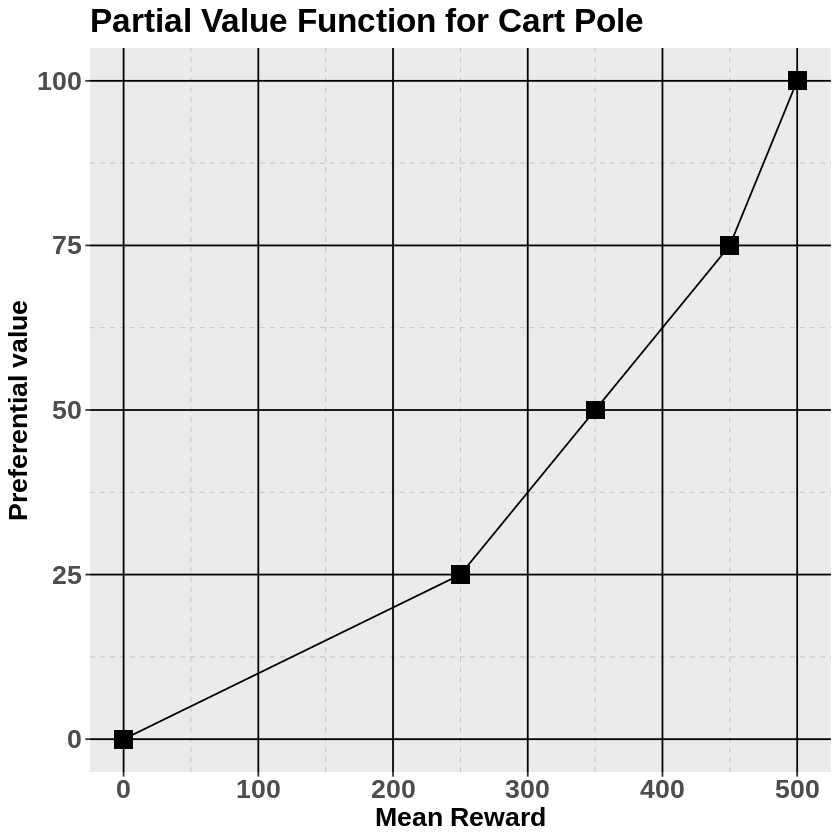

In [ ]:
# Load ggplot2 package
library(ggplot2)

# Create data frame for the points
data <- data.frame(
  x = c(0, 250, 350, 450, 500), # Your x values
y =c(0, 25, 50, 75, 100) # Your corresponding y values
)

# Create piece-wise linear plot
plot <- ggplot(data, aes(x = x, y = y)) +
  geom_line() +
  geom_point(shape = 15, size = 5, color = "black") +  # Square points, larger size, black color
  labs(
    x = "Mean Reward",  # Updated x-axis title
    y = "Preferential value" ,   # Updated y-axis title
    title = "Partial Value Function for Cart Pole"
  ) +
  scale_x_continuous(limits = c(0, 500))+
  scale_y_continuous(limits = c(0, 100)) + # Updated y-axis limits
  theme(
    panel.grid.major = element_line(color = "black", linetype = "solid"),
    panel.grid.minor = element_line(color = "gray", linetype = "dashed"),
    axis.text = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 16, face = "bold"),
    plot.title = element_text(size = 20,face="bold")
  )

# Print the plot
print(plot)

### Constructing Acrobot's Piece-wise Linear Partial Value function from 5 reference points

Creating a mathematical function to use for inputting algorithm performance scores

In [ ]:
# Given (x, y) pairs
x <- c(-500, -200, -150, -75, -50) # Your x values
y <- c(0, 25, 50, 75, 100) # Your corresponding y values

# Construct piecewise linear function
Gacrobot <- approxfun(x, y)

# # Example usage
# x_input <- -72 # Input x value
# y_output <- Gacrobot(x_input) # Output y value
# print(y_output)


Check the Function

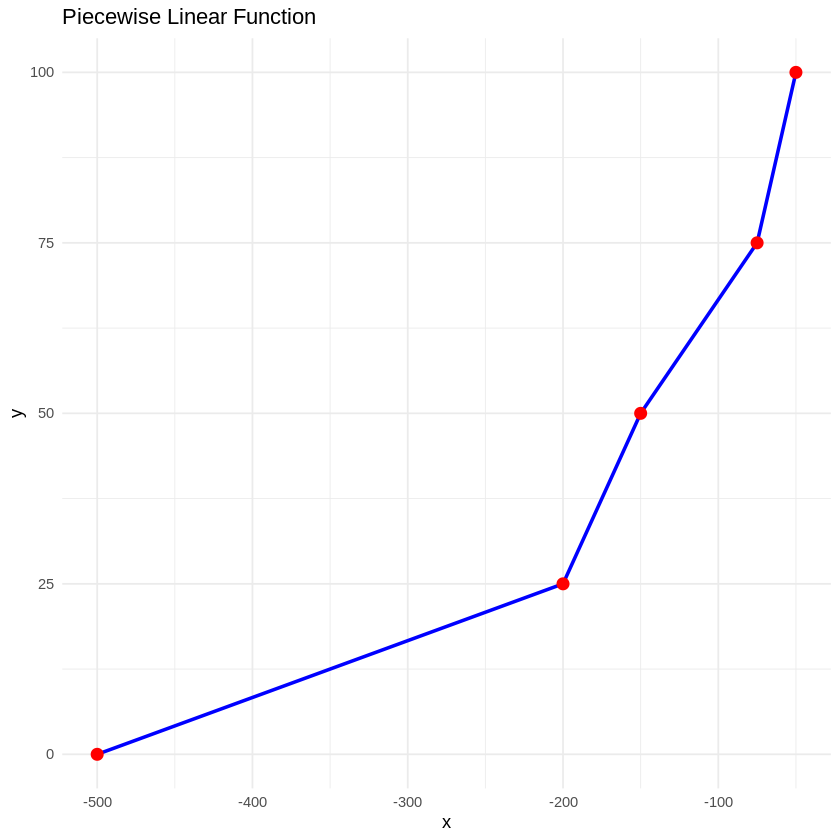

In [ ]:
library(ggplot2)
# Generate x values in the domain [28.7, 500]
x_values <- seq(-500, -50, length.out = 1000)

# Calculate corresponding y values
y_values <- Gacrobot(x_values)

# Plot the piecewise linear function
ggplot() +
  geom_line(aes(x = x_values, y = y_values), color = "blue", size = 1) +
  geom_point(aes(x = x, y = y), color = "red", size = 3) +
  xlim(-500, -50) +
  ylim(0, 100) +
  labs(x = "x", y = "y", title = "Piecewise Linear Function") +
  theme_minimal()

Plotting the Value function:

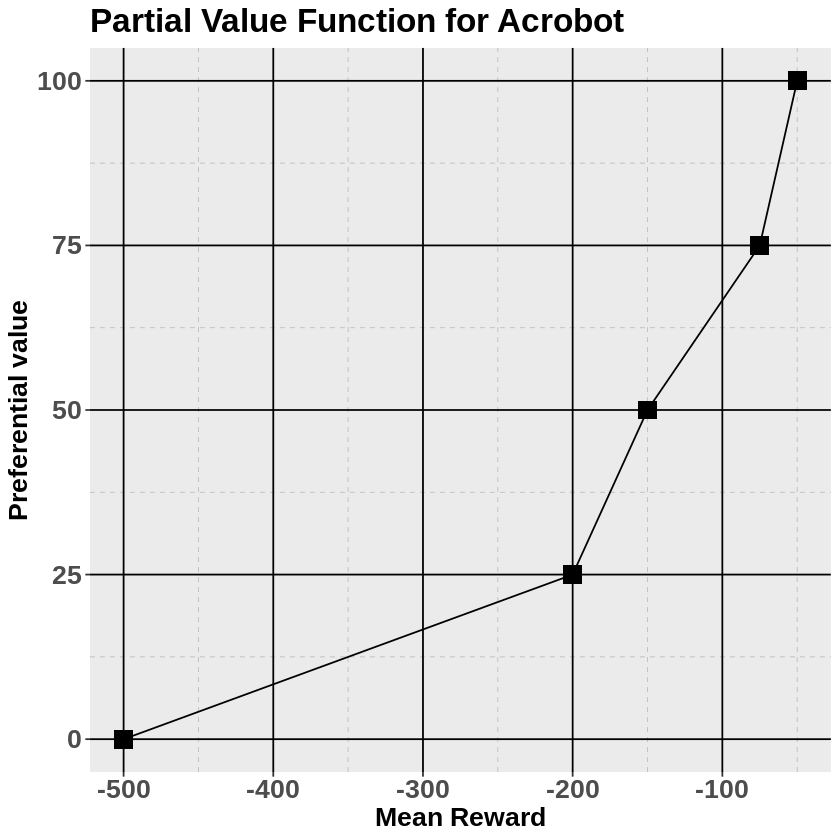

In [ ]:
# Load ggplot2 package
library(ggplot2)

# Create data frame for the points
data <- data.frame(
  x <- c(-500, -200, -150, -75, -50), # Your x values
y =c(0, 25, 50, 75, 100) # Your corresponding y values
)

# Create piece-wise linear plot
plot <- ggplot(data, aes(x = x, y = y)) +
  geom_line() +
  geom_point(shape = 15, size = 5, color = "black") +  # Square points, larger size, black color
  labs(
    x = "Mean Reward",  # Updated x-axis title
    y = "Preferential value" ,   # Updated y-axis title
    title = "Partial Value Function for Acrobot"
  ) +
  scale_x_continuous(limits = c(-500, -50))+
  scale_y_continuous(limits = c(0, 100)) + # Updated y-axis limits
  theme(
    panel.grid.major = element_line(color = "black", linetype = "solid"),
    panel.grid.minor = element_line(color = "gray", linetype = "dashed"),
    axis.text = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 16, face = "bold"),
    plot.title = element_text(size = 20,face="bold")
  )

# Print the plot
print(plot)

### Constructing Lunar Lander's Piece-wise Linear Partial Value function from 5 reference points

Creating a mathematical function to use for inputting algorithm performance scores

In [ ]:
# Given (x, y) pairs
x <- c(-3000, -200, 0, 200, 300) # Your x values
y <- c(0, 25, 50, 75, 100) # Your corresponding y values

# Construct piecewise linear function
Glula <- approxfun(x, y)

# Example usage
# x_input <- 250 # Input x value
# y_output <- Glula(x_input) # Output y value
# print(y_output)


Check the Function

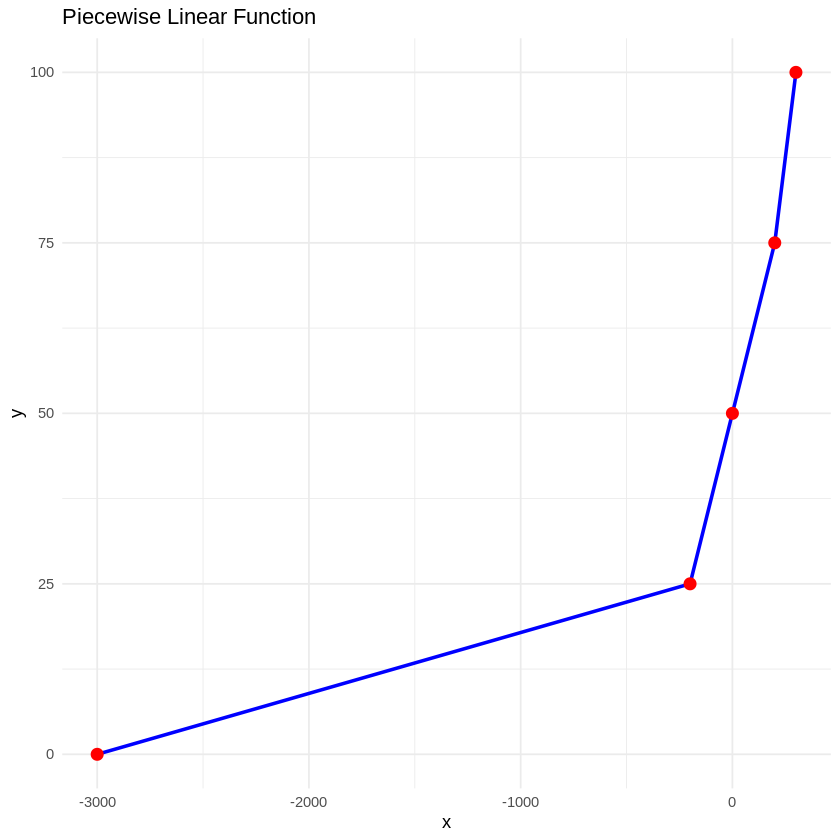

In [ ]:
library(ggplot2)
# Generate x values in the domain [28.7, 500]
x_values <- seq(-3000, 300, length.out = 1000)

# Calculate corresponding y values
y_values <- Glula(x_values)

# Plot the piecewise linear function
ggplot() +
  geom_line(aes(x = x_values, y = y_values), color = "blue", size = 1) +
  geom_point(aes(x = x, y = y), color = "red", size = 3) +
  xlim(-3000, 300) +
  ylim(0, 100) +
  labs(x = "x", y = "y", title = "Piecewise Linear Function") +
  theme_minimal()

Plotting the Value function:

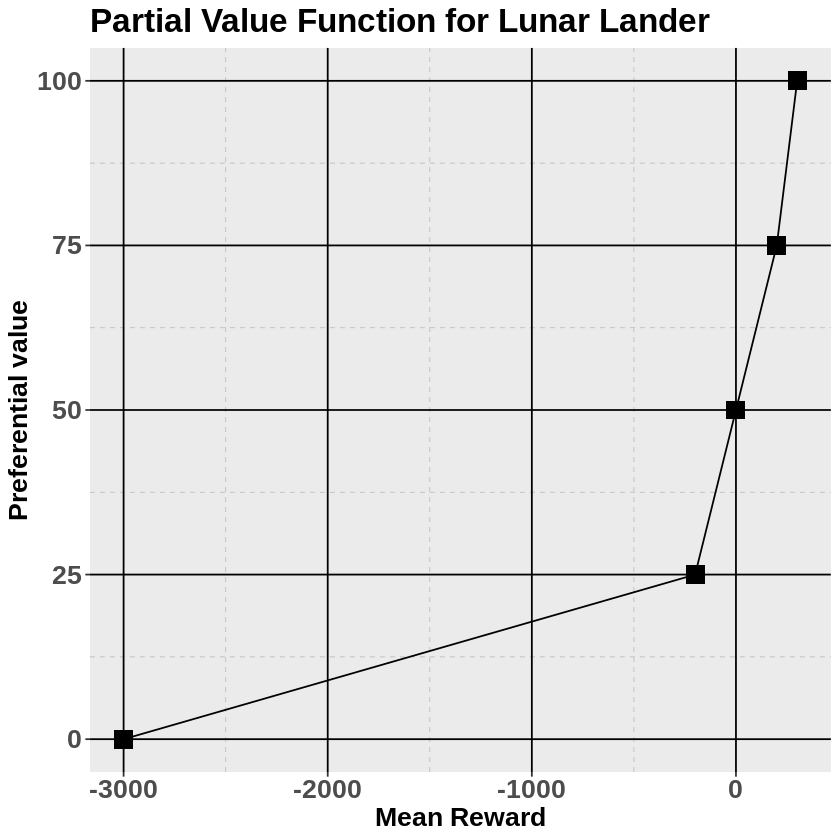

In [ ]:
# Load ggplot2 package
library(ggplot2)

# Create data frame for the points
data <- data.frame(
  x <- c(-3000, -200, 0, 200, 300) , # Your x values
y =c(0, 25, 50, 75, 100) # Your corresponding y values
)

# Create piece-wise linear plot
plot <- ggplot(data, aes(x = x, y = y)) +
  geom_line() +
  geom_point(shape = 15, size = 5, color = "black") +  # Square points, larger size, black color
  labs(
    x = "Mean Reward",  # Updated x-axis title
    y = "Preferential value" ,   # Updated y-axis title
    title = "Partial Value Function for Lunar Lander"
  ) +
  scale_x_continuous(limits = c(-3000, 300))+
  scale_y_continuous(limits = c(0, 100)) + # Updated y-axis limits
  theme(
    panel.grid.major = element_line(color = "black", linetype = "solid"),
    panel.grid.minor = element_line(color = "gray", linetype = "dashed"),
    axis.text = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 16, face = "bold"),
    plot.title = element_text(size = 20,face="bold")
  )

# Print the plot
print(plot)

### Print All Disaggregated Performance Data

In [ ]:
library(dplyr)
count = 1
for(i in 1:3)
{
  for(j in 1:3)
  {
    switch(count,
              print(cat(envs[i],algs[j],a2cCart,sep=" ")),
              print(cat(envs[i],algs[j],dqnCart,sep=" ")),
              print(cat(envs[i],algs[j],ppoCart,sep=" ")),
              print(cat(envs[i],algs[j],a2cAcro,sep=" ")),
              print(cat(envs[i],algs[j],dqnAcro,sep=" ")),
              print(cat(envs[i],algs[j],ppoAcro,sep=" ")),
              print(cat(envs[i],algs[j],a2cLuLa,sep=" ")),
              print(cat(envs[i],algs[j],dqnLuLa,sep=" ")),
              print(cat(envs[i],algs[j],ppoLuLa,sep=" ")),
               DEFAULT = "NA")
    count = count + 1
  }
}

cart a2c 254.7 500 500 500 500NULL
cart dqn 28.7 78.7 91.9 122.4 109.2NULL
cart ppo 500 500 500 500 500NULL
acro a2c -82.3 -85.8 -81.9 -83.2 -79.1NULL
acro dqn -119.9 -80.9 -76.7 -74.8 -88.5NULL
acro ppo -81 -100.2 -78.6 -100.7 -79NULL
ll a2c -233.84 -282.12 -30.34 -214.66 -122.4NULL
ll dqn 203.88 220.56 19.3 192.55 -483.13NULL
ll ppo -144.12 -241.09 -141.98 -176.32 -64.03NULL


### Aggregated Performance Scores

First use the swing weight method to elicit weights for each task from the user

In [ ]:
CartPoleWeight = 3/9
LunarLanderWeight = 4/9
Acrobotweight = 2/9

Also save the weights of the runs per task

In [ ]:
N_lula = 5
N_acro = 5
N_cart = 5

cart_weight_q = CartPoleWeight/N_cart
acro_weight_q = Acrobotweight/N_acro
lula_weight_q = LunarLanderWeight/N_lula

Use an additive aggregation function to provide a weighted sum over the normalised raw performance scores. We use our constructed partial value functions and above weights for this.

DQN:

In [ ]:
# DQN
DQN_Score = 0

for(i in 1:3) #tasks
{
  for(j in 1:5)#runs per task
  {

    increment = switch(i,
      (cart_weight_q)*Gcartpole(dqnCart[j]),
      (acro_weight_q)*Gacrobot(dqnAcro[j]),
      (lula_weight_q)*Glula(dqnLuLa[j])
      )
      DQN_Score = DQN_Score + increment
  }
}

print(DQN_Score)

[1] 45.68718


A2C:

In [ ]:
#A2C

A2C_score = 0
for(i in 1:3) #tasks
{
  for(j in 1:5)#runs per task
  {

    increment = switch(i,
      (cart_weight_q)*Gcartpole(a2cCart[j]),
      (acro_weight_q)*Gacrobot(a2cAcro[j]),
      (lula_weight_q)*Glula(a2cLuLa[j])
      )
      A2C_score = A2C_score + increment
  }
}

print(A2C_score)

[1] 58.28052


PPO:

In [ ]:
# PPO

PPO_score = 0
for(i in 1:3) #tasks
{
  for(j in 1:5)#runs per task
  {

    increment = switch(i,
      (cart_weight_q)*Gcartpole(ppoCart[j]),
      (acro_weight_q)*Gacrobot(ppoAcro[j]),
      (lula_weight_q)*Glula(ppoLuLa[j])
      )
      PPO_score = PPO_score + increment
  }
}

print(PPO_score)

[1] 63.16239
